# LIF model

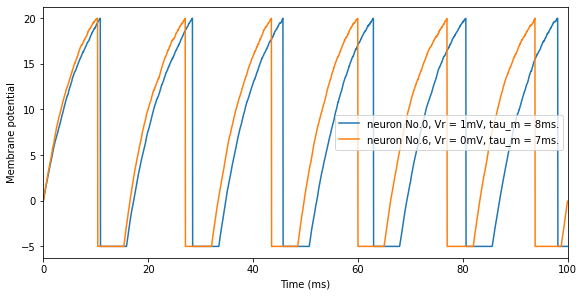

In [3]:
# -*- coding: utf-8 -*-
import brainpy as bp
import brainpy.numpy as np
import matplotlib.pyplot as plt

import bpmodels

#print("version：", bp.__version__)
## set global params
dt = 0.02  # update variables per <dt> ms
duration = 100.  # simulate duration
bp.profile.set(backend="numba", dt=dt, merge_steps=True)

# define neuron type
LIF_neuron = bpmodels.neurons.get_LIF(noise=1.)

# build neuron group
neu = bp.NeuGroup(LIF_neuron, geometry=(10,), monitors=['V', 'refractory', "spike", "t_last_spike"])
neu.runner.set_schedule(['input', 'update', 'monitor', 'reset'])
neu.pars['V_rest'] = np.random.randint(0, 2, size=(10,))
neu.pars['tau'] = np.random.randint(5, 10, size=(10,))
neu.pars['noise'] = 1.

# simulate
neu.run(duration=duration, inputs=["ST.input", 26.], report=False)
# simulate for 100 ms. Give external input = 26.

# paint
ts = neu.mon.ts
fig, gs = bp.visualize.get_figure(1, 1, 4, 8)
fig.add_subplot(gs[0, 0])
plt.plot(ts, neu.mon.V[:, 0],
         label=f'neuron No.{0}, Vr = {neu.pars.get("V_rest")[0]}mV, tau_m = {neu.pars.get("tau")[0]}ms.')
plt.plot(ts, neu.mon.V[:, 6],
         label=f'neuron No.{6}, Vr = {neu.pars.get("V_rest")[6]}mV, tau_m = {neu.pars.get("tau")[6]}ms.')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential')
plt.xlim(-0.1, ts[-1] + 0.1)
plt.legend()
plt.show()
